
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Oct 14, 2019)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval
    * (b) the point estimate
    * (c) the margin of error.

In [17]:
import math
import io
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import scipy.spatial
import scipy.optimize

(0.469, 0.531)

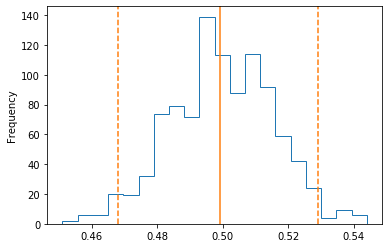

In [24]:
bigpoll=pd.read_csv('poll-larger.csv')
bigpoll['vote'].value_counts(normalize=True)

def sample(orgeronWinPercent,n=1000):
    return pd.DataFrame({'vote':np.where(np.random.rand(n)<orgeronWinPercent,'Saban','Orgeron')})

DF=pd.DataFrame([sample(0.5)['vote'].value_counts(normalize=True) for i in range(1000)])
DF['Orgeron'].plot(kind='hist',histtype='step',bins=20)

plt.axvline(DF['Orgeron'].quantile(0.025), c='C1',linestyle='--')
plt.axvline(DF['Orgeron'].quantile(0.5), c='C1')
plt.axvline(DF['Orgeron'].quantile(0.975), c='C1',linestyle='--')

def samplingdist(orgeronWinPercent,n=1000):
    return pd.DataFrame([sample(orgeronWinPercent,n)['vote'].value_counts(normalize=True) for i in range(1000)])
def quantiles(orgeronWinPercent,n=1000):
    DF=samplingdist(orgeronWinPercent,n=1000)
    return DF['Orgeron'].quantile(0.025), DF['Orgeron'].quantile(0.975)

quantiles(0.5,10000)